Использовать набор данных fashion-mnist

Описать результаты для в зависимости от:
1. Число нейронов в 2-слойной сети.
2. Число слоев 2, 3, 5, 10 с близким по значению количеству нейронов
3. Фиксировать для тренировочного и тестого набора метрику accuracy

Проверить работу разных оптимизиторов (SGD, Adam, RMSProp) для одной модели и фиксировать accuracy для валидации и теста.

Что помогло улучшить качество классификации?

Оценить качество модели по каждому классу (полнота, точность). Сделать выводы.

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
(train_image_source, train_label), (test_image_source, test_label) = fashion_mnist.load_data()

In [3]:
# Normalize
train_image = (train_image_source / 255) - 0.5
test_image = (test_image_source / 255) - 0.5

In [4]:
# Flatten
train_image = train_image.reshape(-1, 784)
test_image = test_image.reshape(-1, 784)

##### Цикл оценки модели по различному количеству (32, 64, 128, 256) нейронов для 2-слойной сети

In [5]:
%%time
accuracy_dict_1 = {}
neuron_num_list = [32, 64, 128, 256]

for neuron_num in neuron_num_list:
    model = Sequential([
        Dense(neuron_num, activation='relu', input_shape=(784,)),
        Dense(neuron_num, activation='relu'),
        Dense(10, activation='softmax')
                        ])

    model.compile(optimizer='Adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    model.fit(train_image,
               to_categorical(train_label),
               epochs=5,
               batch_size=32,
               verbose=False)

    # Оценка модели
    train_accuracy = model.evaluate(train_image, to_categorical(train_label))[1]
    test_accuracy = model.evaluate(test_image, to_categorical(test_label))[1]
    
    accuracy_dict_1[f'{neuron_num} neurons'] = round(train_accuracy, 4), round(test_accuracy, 4)

313/313 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8646
CPU times: total: 5min 25s
Wall time: 2min 33s


In [6]:
print('               Train    Test')
accuracy_dict_1

               Train    Test


{'32 neurons': (0.8835, 0.8601),
 '64 neurons': (0.8942, 0.871),
 '128 neurons': (0.8898, 0.8673),
 '256 neurons': (0.8937, 0.8646)}

Лучший результат показала сеть со 256 нейронами. Следовательно количество слоёв будем подбирать с количеством нейронов примерно равным 256.

##### Цикл оценки модели по различному количеству слоев.

In [7]:
%%time
accuracy_dict_2 = {}
layer_num_list = [2, 3, 5, 10]
nn_list = []

for layer_num in layer_num_list:
    # Создание входного слоя
    model = Sequential(Dense(256, activation='relu', input_shape=(784,)))
    
    # Создание внутренних слоёв, кроме выходного
    for l in range(layer_num - 1):
        nn = np.random.randint(240, 280, 1) # рандомизация нейронов в слое
        nn_list.append((l, nn))
        model.add(Dense(nn, activation='relu'))
    
    # Создание выходного слоя
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='Adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    model.fit(train_image,
               to_categorical(train_label),
               epochs=5,
               batch_size=32,
               verbose=False)

    # Оценка модели
    train_accuracy = model.evaluate(train_image, to_categorical(train_label))[1]
    test_accuracy = model.evaluate(test_image, to_categorical(test_label))[1]
    
    accuracy_dict_2[f'{layer_num} layers'] = round(train_accuracy, 4), round(test_accuracy, 4)

313/313 [==============================] - 2s 5ms/step - loss: 0.4201 - accuracy: 0.8534
CPU times: total: 12min 25s
Wall time: 3min 46s


In [8]:
print('               Train   Test')
accuracy_dict_2

               Train   Test


{'2 layers': (0.9027, 0.8753),
 '3 layers': (0.8983, 0.8728),
 '5 layers': (0.8887, 0.8636),
 '10 layers': (0.8749, 0.8534)}

5-слойная сеть показала начилучшие результаты, однако разница по сравнению с другими сетями незначительная.

##### Цикл подбора оптимизатора.

In [9]:
optimizers = ['SGD', 'Adam', 'RMSProp']
activation = 'relu'

In [10]:
accuracy_dict_3 = {}
for optimizer in optimizers:
    model = Sequential([
        Dense(256, activation, input_shape=(784,)),
        Dense(256, activation),
        Dense(256, activation),
        Dense(10, 'softmax')
    ])

    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    model.fit(train_image,
              to_categorical(train_label),
              epochs=5,
              batch_size=32,
              verbose=False)
    
    # Оценка модели
    train_accuracy = model.evaluate(train_image, to_categorical(train_label))[1]
    test_accuracy = model.evaluate(test_image, to_categorical(test_label))[1]
    
    accuracy_dict_3[f'{optimizer} optimizer'] = round(train_accuracy, 4), round(test_accuracy, 4)

313/313 [==============================] - 1s 4ms/step - loss: 0.5564 - accuracy: 0.8337


In [11]:
print('                   Train   Test')
accuracy_dict_3

                   Train   Test


{'SGD optimizer': (0.877, 0.8583),
 'Adam optimizer': (0.8985, 0.87),
 'RMSProp optimizer': (0.8565, 0.8337)}

Adam показал наилучший результат

Наибольшее влияние на улучшение модели оказало увеличение числа нейронов и выбор оптимизатора Adam.

Изменение числа слоев нейронной сети не оказало существенного влияния на качество модели.

#### Финальное построение модели

In [12]:
%%time
model = Sequential([
        Dense(240, activation, input_shape=(784,)),
        Dense(256, activation),
        Dense(280, activation),
        Dense(256, activation),
        Dense(240, activation),
        Dense(10, 'softmax')
    ])

model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_image,
          to_categorical(train_label),
          epochs=5,
          batch_size=32,
          verbose=False)

# Оценка модели
train_accuracy = model.evaluate(train_image, to_categorical(train_label))[1]
test_accuracy = model.evaluate(test_image, to_categorical(test_label))[1]

313/313 [==============================] - 2s 4ms/step - loss: 0.3616 - accuracy: 0.8737
CPU times: total: 2min 51s
Wall time: 56.7 s


In [13]:
train_accuracy, test_accuracy

(0.8995833396911621, 0.8737000226974487)

#### Оценка финальной модели

In [14]:
test_pred_proba = model.predict(test_image, batch_size=32, verbose=False)
test_pred_label = np.argmax(test_pred_proba, axis=1)

In [15]:
print(classification_report(test_label, test_pred_label))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.86      0.89      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.95      0.94      0.95      1000
           6       0.73      0.63      0.67      1000
           7       0.93      0.94      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Хуже всего модель предсказывает класс 6, в меньшей степени плохо - класс 4, 2 и 0.

Посмотрим каким изображениям соответствуют эти классы.

In [16]:
np.where(train_label==6)[0]

array([   18,    32,    33, ..., 59973, 59987, 59988], dtype=int64)

In [17]:
np.where(train_label==4)[0]

array([   19,    22,    24, ..., 59984, 59986, 59990], dtype=int64)

In [18]:
np.where(train_label==2)[0]

array([    5,     7,    27, ..., 59977, 59981, 59993], dtype=int64)

In [19]:
np.where(train_label==0)[0]

array([    1,     2,     4, ..., 59974, 59985, 59998], dtype=int64)

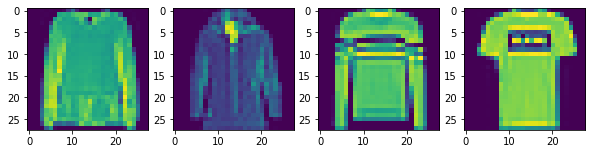

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1, 4, 1)
plt.imshow(train_image_source[18])

plt.subplot(1, 4, 2)
plt.imshow(train_image_source[19])

plt.subplot(1, 4, 3)
plt.imshow(train_image_source[5])

plt.subplot(1, 4, 4)
plt.imshow(train_image_source[1])

plt.show()

Видно, что классификатор плохо различает верхнюю одежду, особенно класс 6 (он расположен первым среди изображений выше).